<a href="https://colab.research.google.com/github/sommnathrwategaonkar/MOPSO/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📤 Upload NORMAL X-rays...


Saving normal_001.png to normal_001.png
Saving normal_002.png to normal_002.png
Saving normal_003.png to normal_003.png
Saving normal_004.png to normal_004.png
Saving normal_005.png to normal_005.png
Saving normal_006.png to normal_006.png
Saving normal_007.png to normal_007.png
Saving normal_008.png to normal_008.png
Saving normal_009.png to normal_009.png
Saving normal_010.png to normal_010.png
Saving normal_011.png to normal_011.png
Saving normal_012.png to normal_012.png
Saving normal_013.png to normal_013.png
Saving normal_014.png to normal_014.png
Saving normal_015.png to normal_015.png
Saving normal_016.png to normal_016.png
Saving normal_017.png to normal_017.png
Saving normal_018.png to normal_018.png
Saving normal_019.png to normal_019.png
Saving normal_020.png to normal_020.png
📤 Upload ABNORMAL X-rays...


Saving abnormal_001.png to abnormal_001.png
Saving abnormal_002.png to abnormal_002.png
Saving abnormal_003.png to abnormal_003.png
Saving abnormal_004.png to abnormal_004.png
Saving abnormal_005.png to abnormal_005.png
Saving abnormal_006.png to abnormal_006.png
Saving abnormal_007.png to abnormal_007.png
Saving abnormal_008.png to abnormal_008.png
Saving abnormal_009.png to abnormal_009.png
Found 24 images belonging to 2 classes.
Found 5 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.6971 - precision: 0.8333 - recall: 0.3125 - val_accuracy: 0.8000 - val_loss: 0.6437 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 0.6768 - precision: 0.6667 - recall: 1.0000 - val_accuracy: 0.2000 - val_loss: 0.9033 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 0.6740 - precision: 0.0000e+00 - 

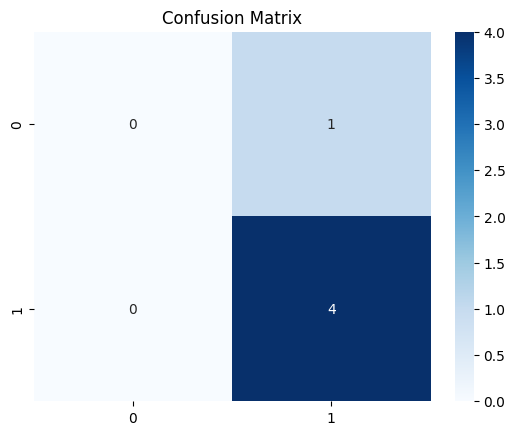

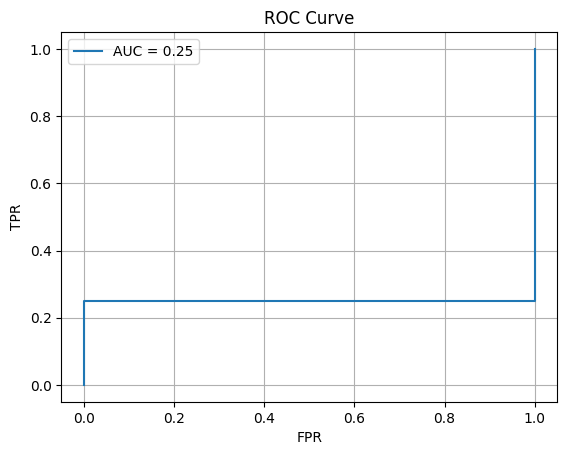


📈 Performance Metrics Table:
               precision  recall  f1-score  support
0                  0.00     0.0     0.000      1.0
1                  0.80     1.0     0.889      4.0
accuracy           0.80     0.8     0.800      0.8
macro avg          0.40     0.5     0.444      5.0
weighted avg       0.64     0.8     0.711      5.0


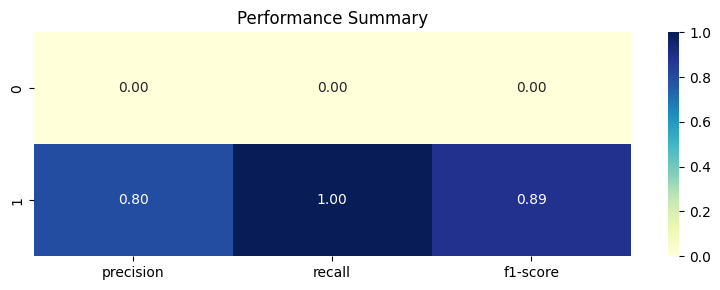

✅ Model loaded from .keras file.
📥 Upload test images for prediction...


Saving abnormal_028.png to abnormal_028.png
Saving abnormal_029.png to abnormal_029.png
Saving abnormal_030.png to abnormal_030.png
Saving abnormal_031.png to abnormal_031.png
Saving abnormal_032.png to abnormal_032.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step

📂 abnormal_028.png — 🩸 Lung Cancer Detected (Confidence: 0.68)


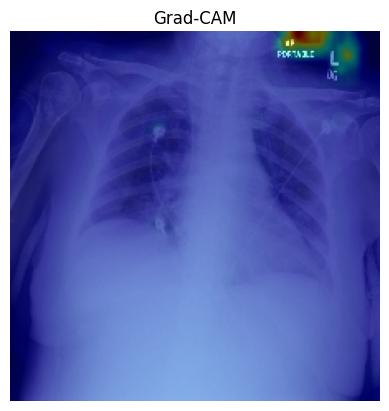

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

📂 abnormal_029.png — 🩸 Lung Cancer Detected (Confidence: 0.77)


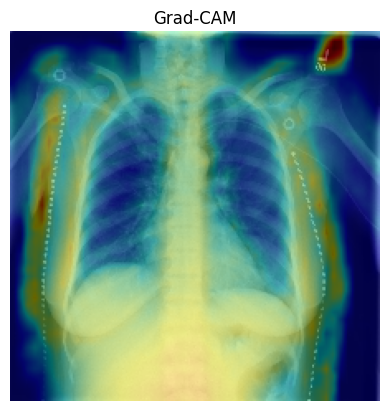

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

📂 abnormal_030.png — 🩸 Lung Cancer Detected (Confidence: 0.76)


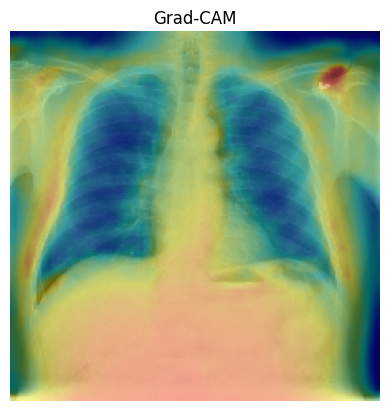

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

📂 abnormal_031.png — 🩸 Lung Cancer Detected (Confidence: 0.76)


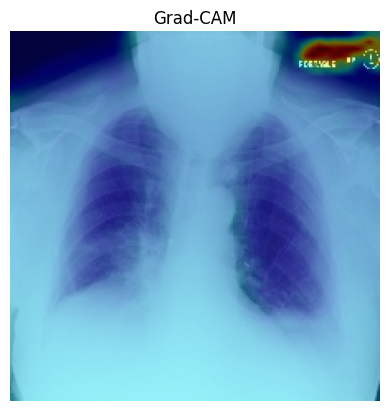

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

📂 abnormal_032.png — 🩸 Lung Cancer Detected (Confidence: 0.78)


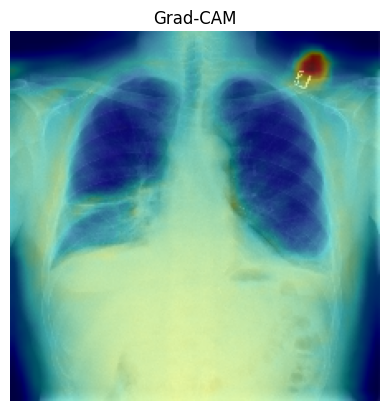

In [3]:
import os, numpy as np, cv2, matplotlib.pyplot as plt, seaborn as sns, tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from google.colab import files
from pandas import DataFrame
import shutil, warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# ✅ 1. Build Lightweight CNN
def build_model(input_shape=(224, 224, 3)):
    inputs = Input(shape=input_shape)
    x = Conv2D(16, (3,3), activation='relu')(inputs)
    x = MaxPooling2D()(x)
    x = Conv2D(32, (3,3), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(64, (3,3), activation='relu', name='last_conv')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    return model

model = build_model()

# ✅ 2. Upload Dataset
def upload_dataset():
    os.makedirs("/content/lung_dataset/normal", exist_ok=True)
    os.makedirs("/content/lung_dataset/abnormal", exist_ok=True)
    print("📤 Upload NORMAL X-rays..."); normal = files.upload()
    for f in normal: shutil.move(f, f"/content/lung_dataset/normal/{f}")
    print("📤 Upload ABNORMAL X-rays..."); abnormal = files.upload()
    for f in abnormal: shutil.move(f, f"/content/lung_dataset/abnormal/{f}")

upload_dataset()

# ✅ 3. Load Dataset (No Augmentation)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = datagen.flow_from_directory('/content/lung_dataset', target_size=(224, 224),
    batch_size=32, class_mode='binary', subset='training', shuffle=True)
val_gen = datagen.flow_from_directory('/content/lung_dataset', target_size=(224, 224),
    batch_size=32, class_mode='binary', subset='validation', shuffle=False)

# ✅ 4. Compute Class Weights
y_train = train_gen.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# ✅ 5. Train Model
callbacks = [EarlyStopping(patience=3, restore_best_weights=True),
             ModelCheckpoint("best_model.keras", save_best_only=True)]
model.fit(train_gen, validation_data=val_gen, epochs=10, class_weight=class_weights, callbacks=callbacks)
model.save("lung_cancer_model.keras")
print("✅ Model trained and saved.")

# ✅ 6. Evaluate Model
val_gen.reset()
y_true = val_gen.classes
y_probs = model.predict(val_gen).flatten()
y_pred = (y_probs >= 0.5).astype(int)
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues'); plt.title("Confusion Matrix"); plt.show()
fpr, tpr, _ = roc_curve(y_true, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr,tpr):.2f}")
plt.title("ROC Curve"); plt.xlabel("FPR"); plt.ylabel("TPR")
plt.grid(True); plt.legend(); plt.show()
report_df = DataFrame(classification_report(y_true, y_pred, output_dict=True)).transpose().round(3)
print("\n📈 Performance Metrics Table:\n", report_df)
plt.figure(figsize=(8, 3))
sns.heatmap(report_df.iloc[:2, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Performance Summary"); plt.tight_layout(); plt.show()

# ✅ 7. Grad-CAM
def generate_gradcam(model, image, layer='last_conv'):
    grad_model = Model(inputs=model.input, outputs=[model.get_layer(layer).output, model.output])
    with tf.GradientTape() as tape:
        conv_out, pred = grad_model(image)
        loss = pred[:, 0]
    grads = tape.gradient(loss, conv_out)[0]
    pooled = tf.reduce_mean(grads, axis=(0, 1))
    cam = tf.reduce_sum(conv_out[0] * pooled, axis=-1)
    heatmap = tf.maximum(cam, 0) / (tf.reduce_max(cam) + 1e-8)
    return heatmap.numpy()

def show_gradcam(img, heatmap, fname, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    cam = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(np.uint8(img * 255), 1 - alpha, cam, alpha, 0)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM"); plt.axis('off'); plt.show()
    cv2.imwrite(f"gradcam_{os.path.basename(fname)}", overlay)

# ✅ 8. Predict with Grad-CAM
def preprocess_image(path):
    img = load_img(path, target_size=(224, 224))
    arr = img_to_array(img) / 255.0
    if arr.shape[-1] == 1: arr = np.repeat(arr, 3, axis=-1)
    return np.expand_dims(arr, 0), arr

def upload_and_predict():
    model_loaded = tf.keras.models.load_model("lung_cancer_model.keras")
    print("✅ Model loaded from .keras file.")
    print("📥 Upload test images for prediction...")
    uploaded = files.upload()
    for fname in uploaded:
        try:
            xb, orig = preprocess_image(fname)
            pred = model_loaded.predict(xb)[0][0]
            label = "🩸 Lung Cancer Detected" if pred >= 0.5 else "✅ No Lung Cancer"
            print(f"\n📂 {fname} — {label} (Confidence: {pred:.2f})")
            heatmap = generate_gradcam(model_loaded, xb)
            show_gradcam(orig, heatmap, fname)
        except Exception as e:
            print(f"❌ Error: {e}")

upload_and_predict()


